# **GROUP 9: LIFE EXPECTANCY PREDICTION 🕦**

Dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Objectives:

1. To explore identify significant variables that influences life
expectancy using EDA and statistical techniques.
2. To construct several parsimonious regression models for global
life expectancy prediction.
3. To compare the performance of the regression models in
predicting life expectancy using performance metrics.




***IMPORTANT!!! SPECIFY PATH***

In [ ]:
# YUEN SENG
from google.colab import drive
import pandas as pd


drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/WQD 7005
df =pd.read_csv('Life Expectancy Data.csv',header=0)
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/WQD 7005
 Box_plots   KDE_plots			 Scatterplot
 Heatmap    'Life Expectancy Data.csv'	'WQD7005 Life Expectancy Prediction.ipynb'


In [ ]:
#JUSTIN
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/7005-Data Mining
!ls
df = pd.read_csv('Life Expectancy Data.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/7005-Data Mining
'Life Expectancy Data.csv'


In [ ]:
# DENNIS
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Life_Expectancy_Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CASS

from google.colab import drive
import pandas as pd


drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive
!ls
df =pd.read_csv('Life Expectancy Data.csv',header=0)

Mounted at /content/gdrive
/content/gdrive/My Drive
'7005 development.gdoc'  'Colab Notebooks'  'Life Expectancy Data.csv'	 others


# **SAMPLING**

## Preliminary Exploration

In [ ]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

# **EXPLORE**

In [ ]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.groupby('Status')['Country'].nunique()

Status
Developed      32
Developing    161
Name: Country, dtype: int64

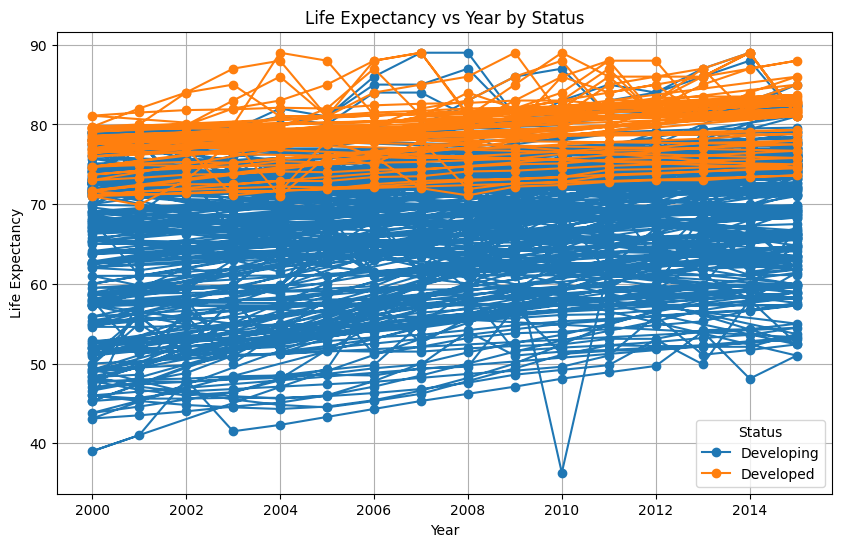

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for status in df['Status'].unique():
    subset = df[df['Status'] == status]
    plt.plot(subset['Year'], subset['Life expectancy'], marker='o', linestyle='-', label=status)

# Add titles and labels
plt.title('Life Expectancy vs Year by Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Status')
plt.grid(True)

## Histogram, Box Plots and Heatmap


1. distribution plot to visualize the distribution of the vairable
2. box plot to identified any potential outlier
3. heatmap to visualize the relationship between variable

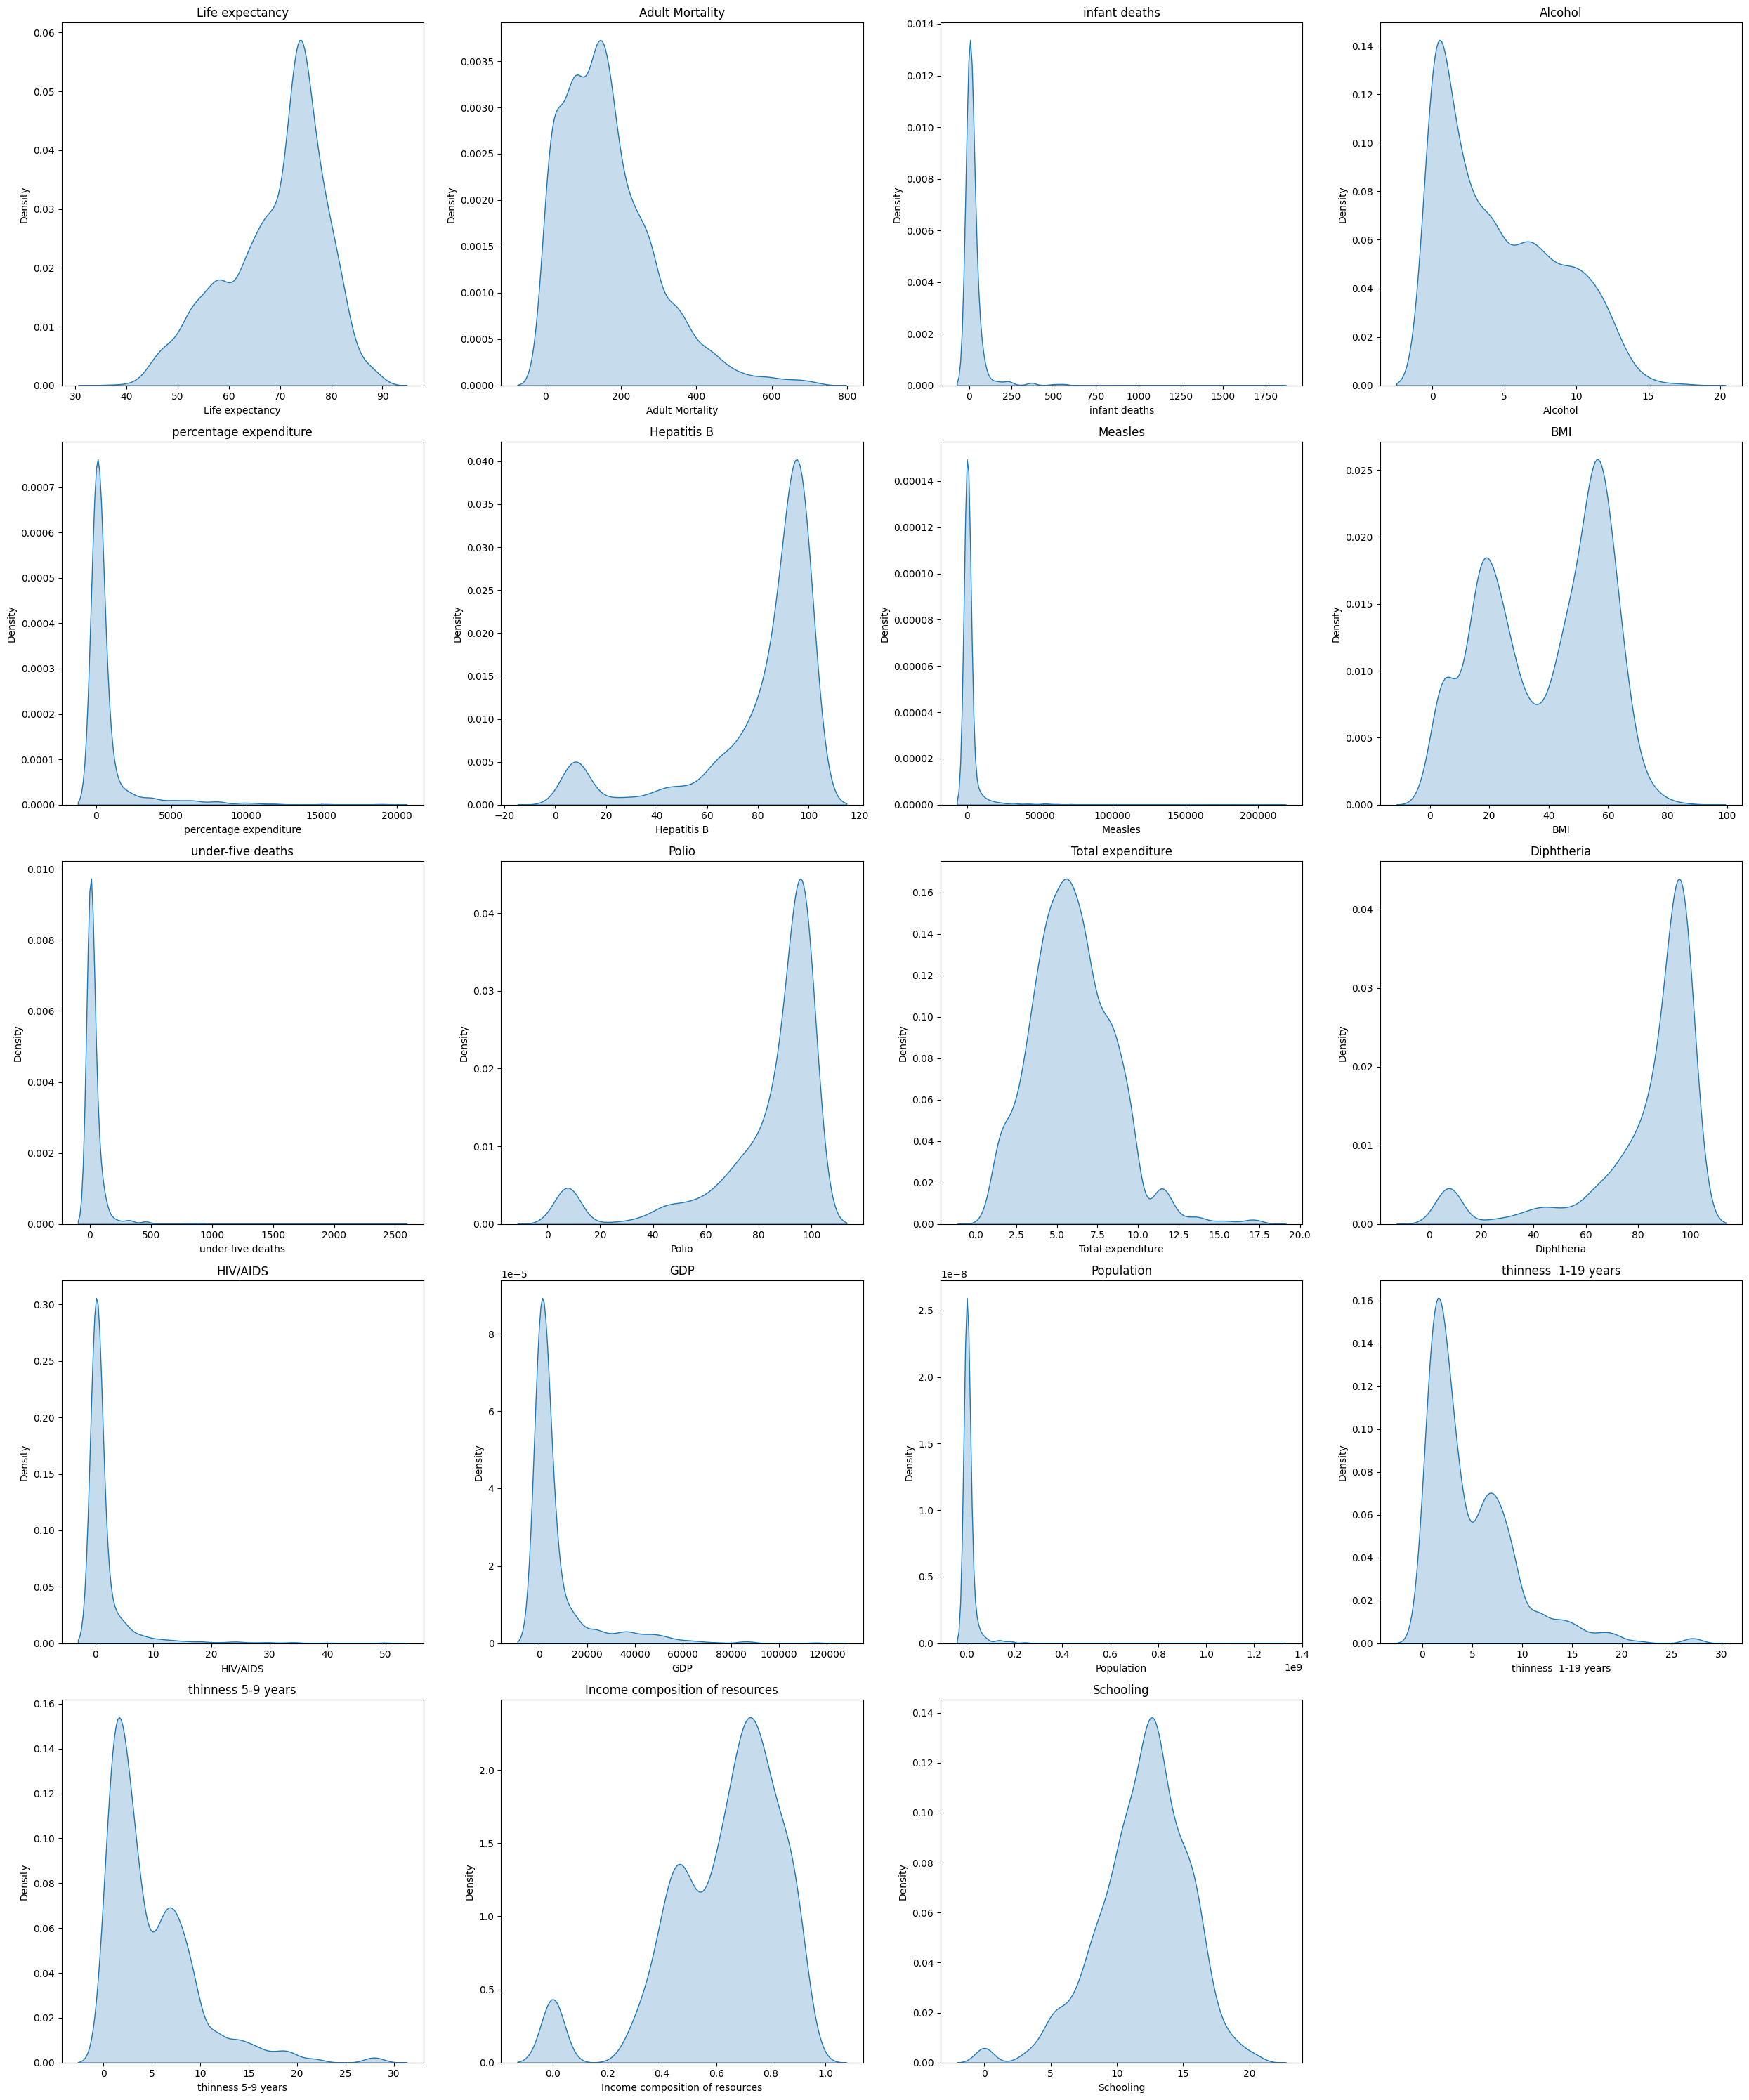

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

cols = df.select_dtypes("number").columns
cols = cols[cols != 'Year']

fig = plt.figure(figsize=(25,30))
c = 1
for col in cols:
    plt.subplot(5, 4, c)
    sns.kdeplot(x=col, data=df, fill=True)
    plt.title(col)
    c += 1

plt.savefig("KDE_plots", format="png")

plt.tight_layout()
plt.show()

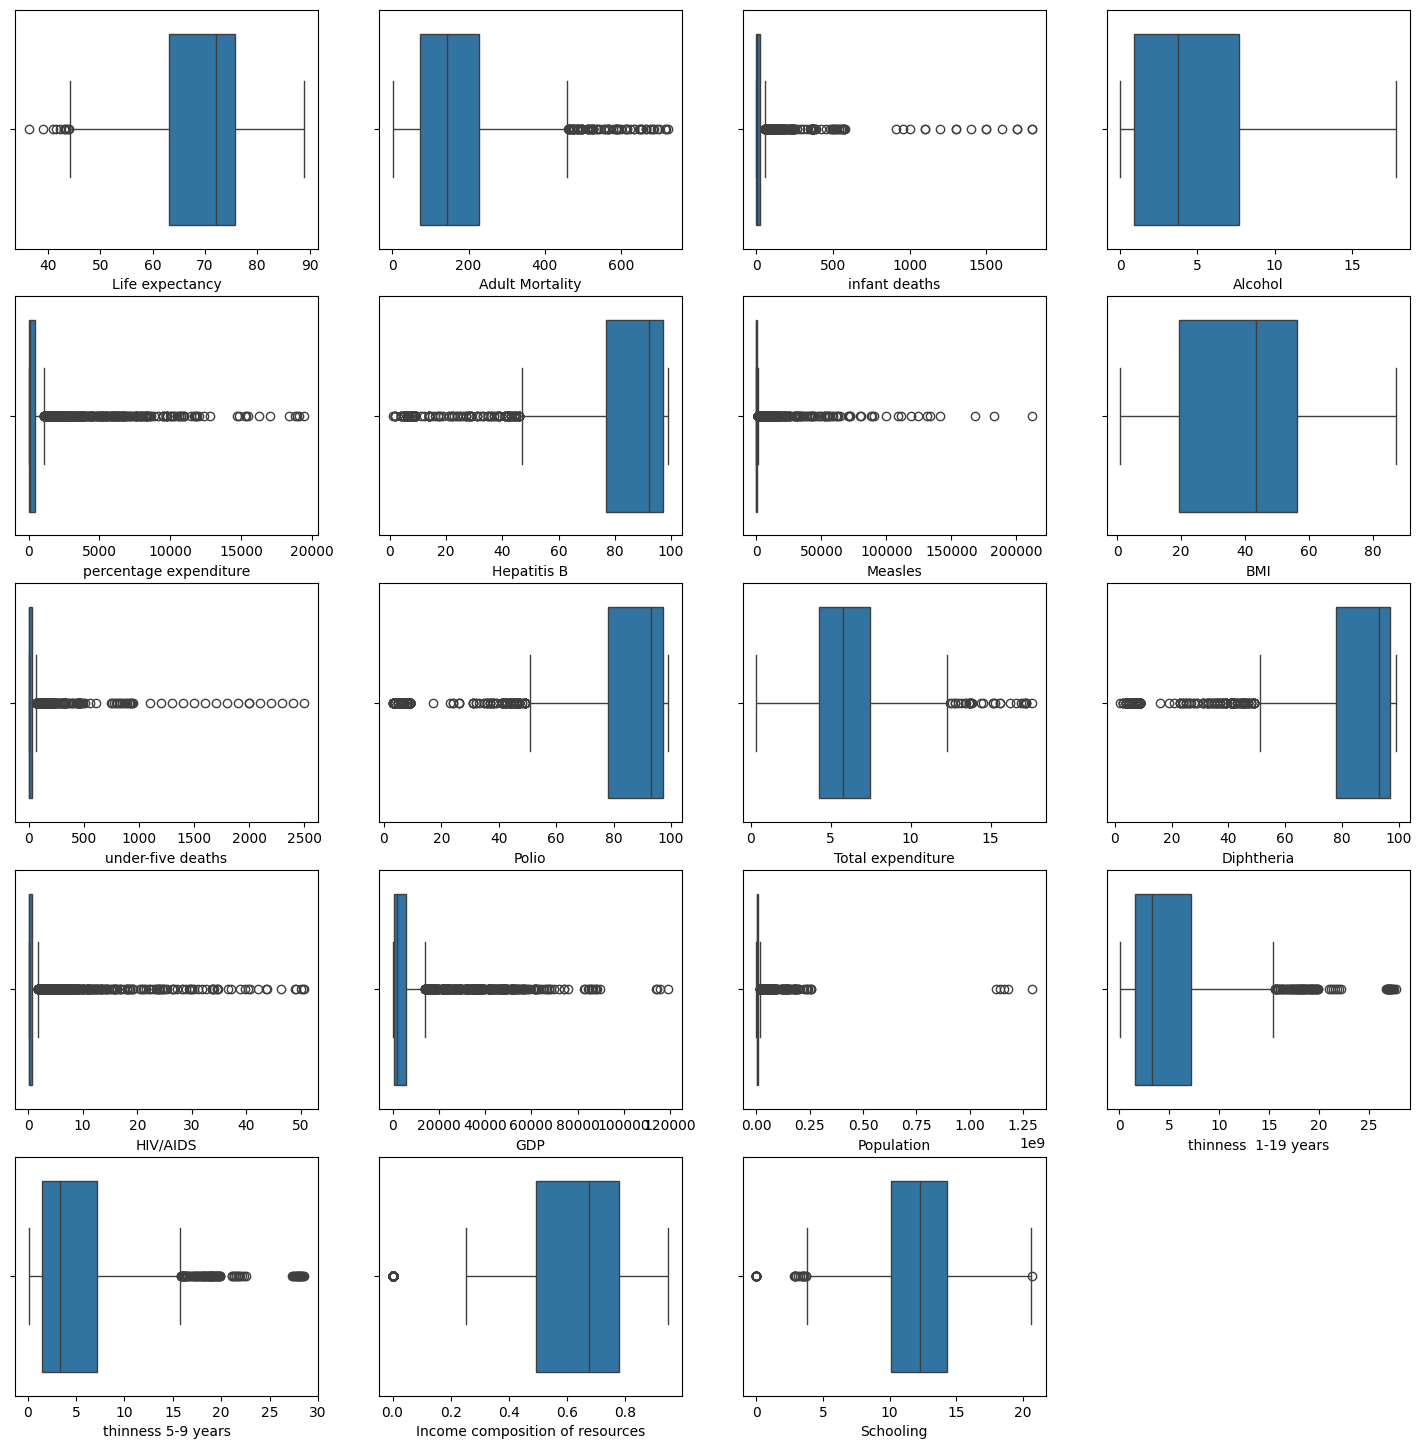

In [ ]:
cols = df.select_dtypes("number").columns
cols = cols[cols != 'Year']
fig = plt.figure(figsize=(18,18))
c = 1

for col in cols:
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=df)
    plt.savefig("Box_plots", format="png")
    c = c + 1




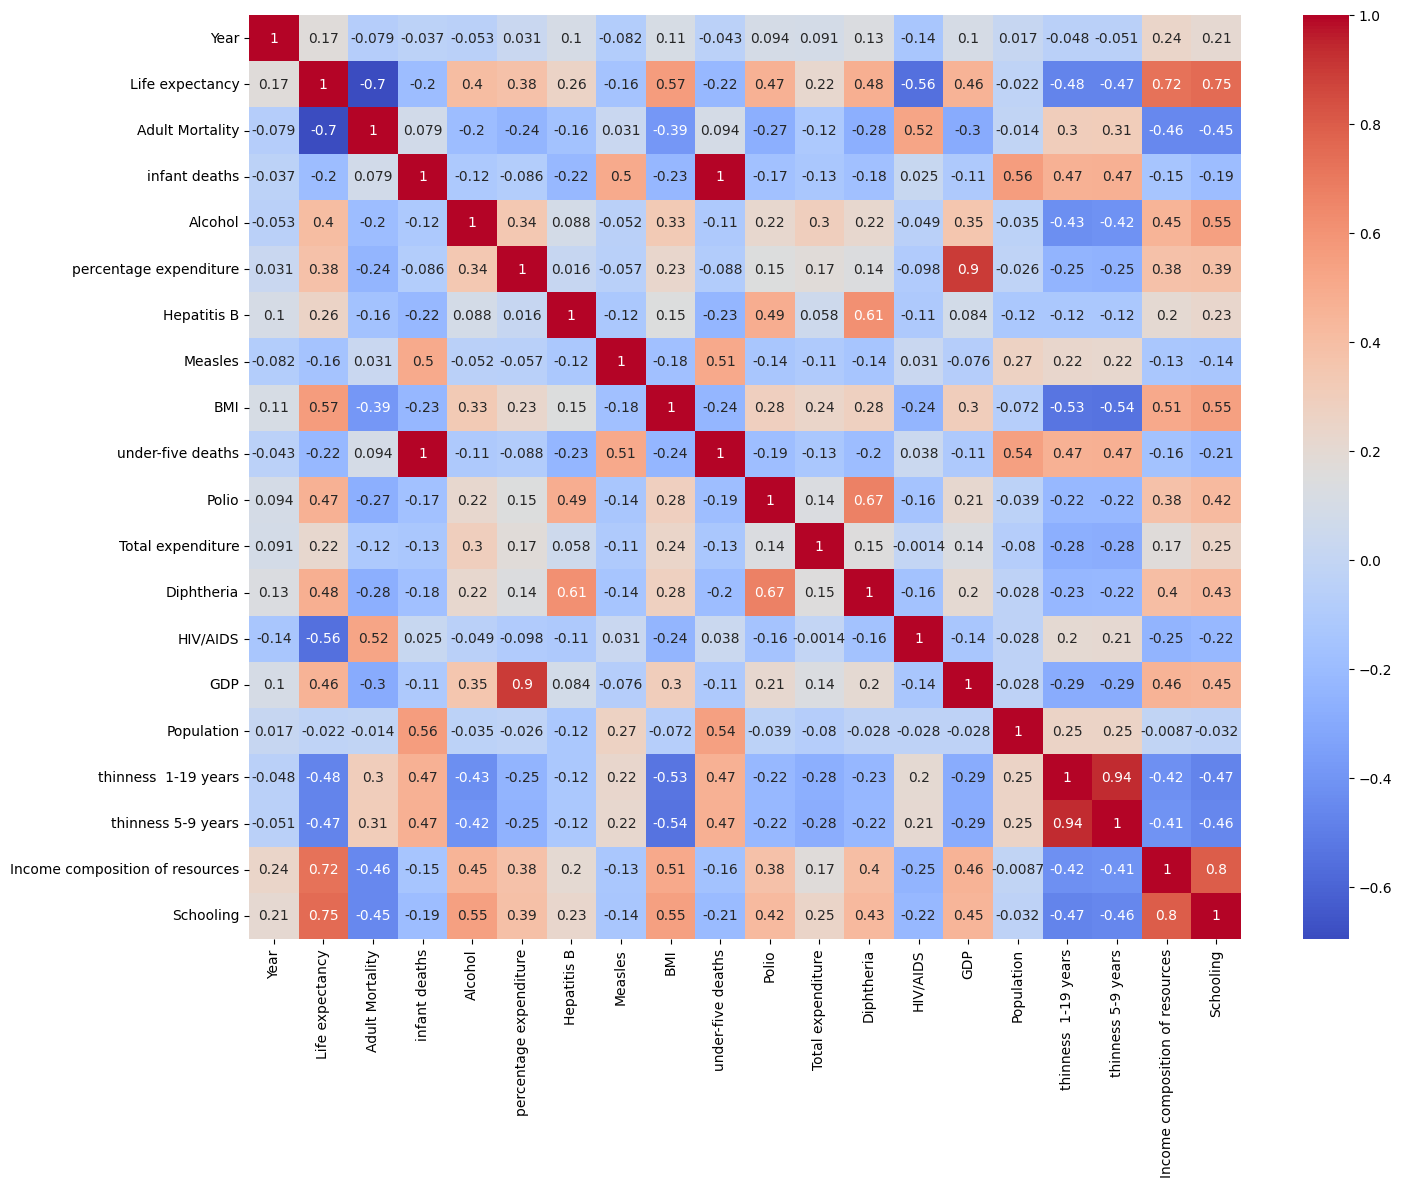

In [ ]:
features = df.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df[list(features.columns)].corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax)
plt.savefig("Heatmap", format="png")

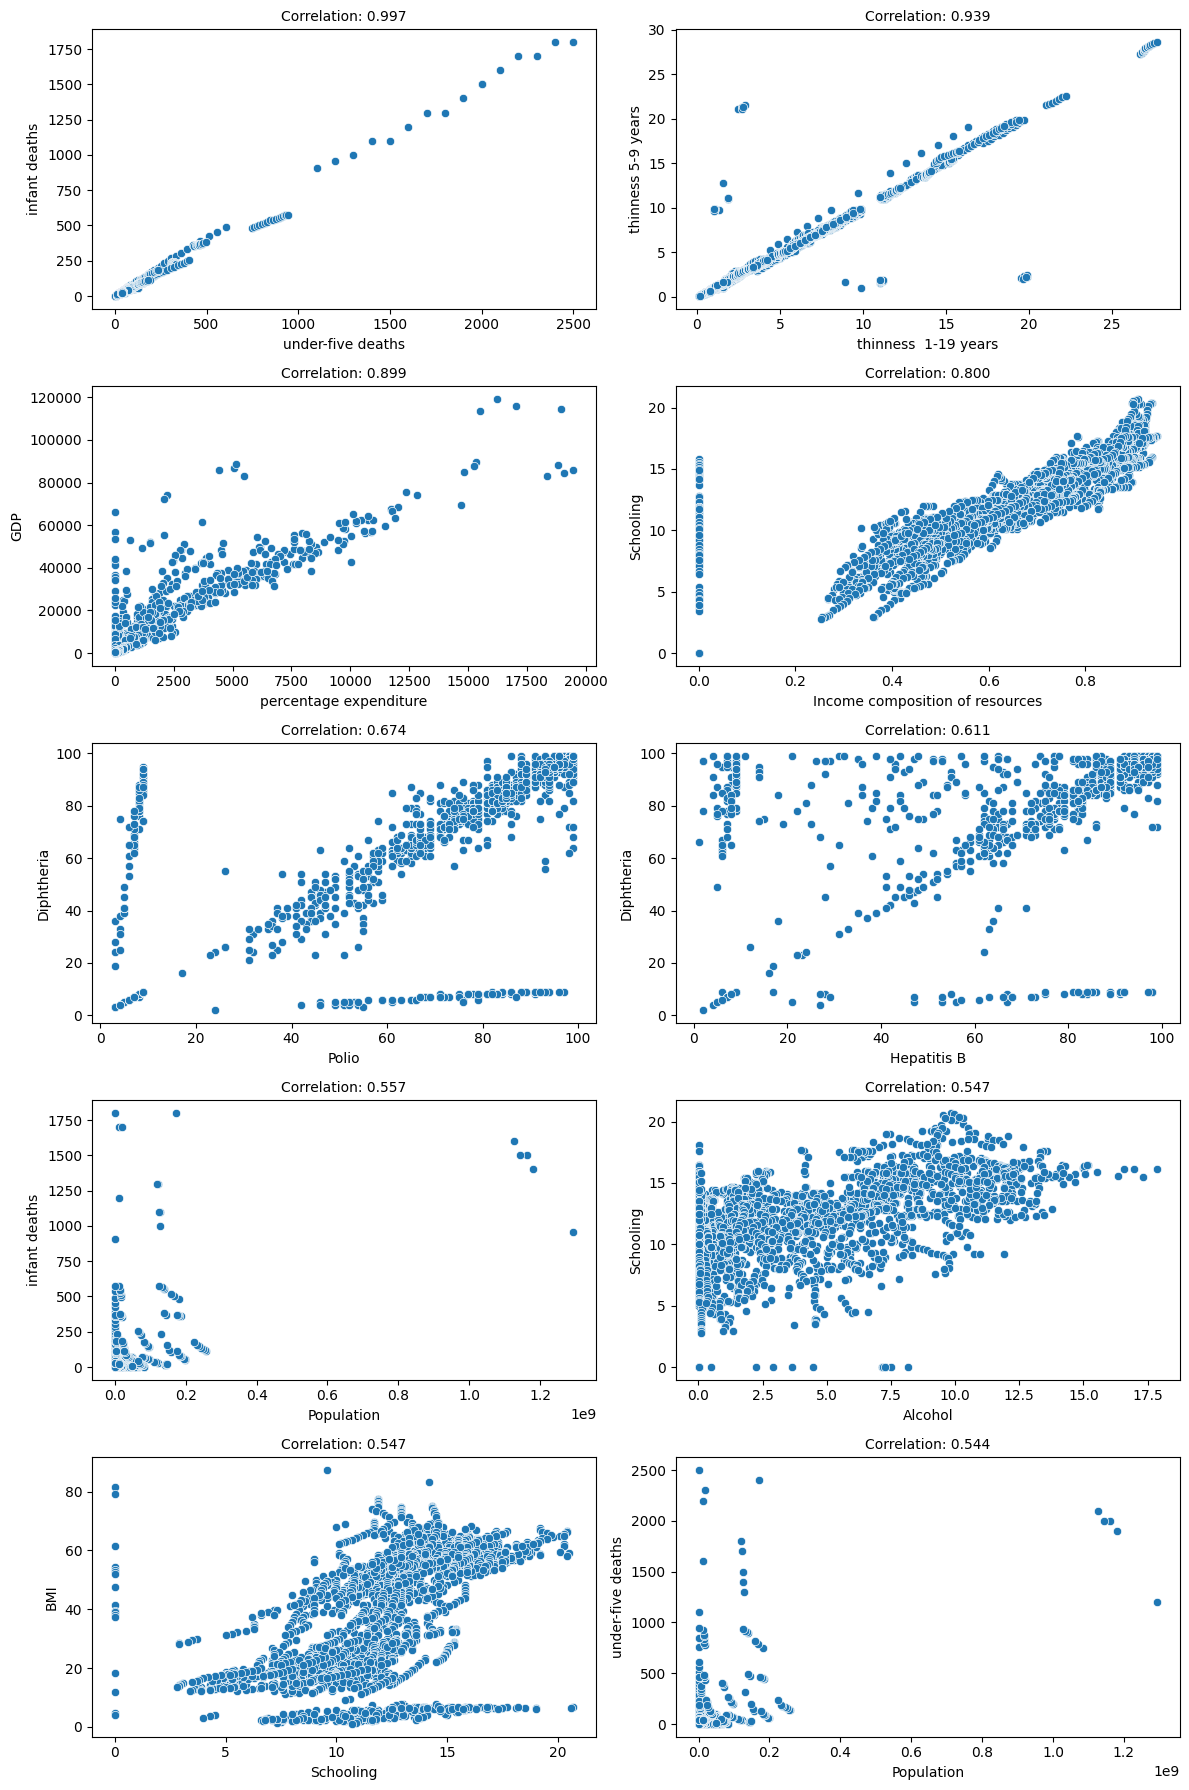

In [ ]:
numeric_df = df.select_dtypes(include='number').drop(columns=['Life expectancy'])

corr_matrix = numeric_df.corr(method='pearson')
abs_corr_values = corr_matrix.abs().unstack()
sorted_corr_values = abs_corr_values.sort_values(ascending=False)

sorted_corr_values = sorted_corr_values.reset_index()
sorted_corr_values.columns = ['Feature1', 'Feature2', 'Correlation']
sorted_corr_values = sorted_corr_values[sorted_corr_values['Feature1'] != sorted_corr_values['Feature2']]

considered_pairs = set()
unique_top_pairs = []

for _, row in sorted_corr_values.iterrows():
    pair = tuple(sorted([row['Feature1'], row['Feature2']]))
    if pair not in considered_pairs:
        considered_pairs.add(pair)
        unique_top_pairs.append(row)

top_10_pairs = unique_top_pairs[:10]

plt.figure(figsize=(12, 18))
for idx, row in enumerate(top_10_pairs, 1):
    feature1, feature2 = row['Feature1'], row['Feature2']
    correlation_value = row['Correlation']

    plt.subplot(5, 2, idx)
    sns.scatterplot(x=feature1, y=feature2, data=df)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Correlation: {correlation_value:.3f}', fontsize=10)


plt.tight_layout()
plt.savefig("Scatterplot", format="png")
plt.show()

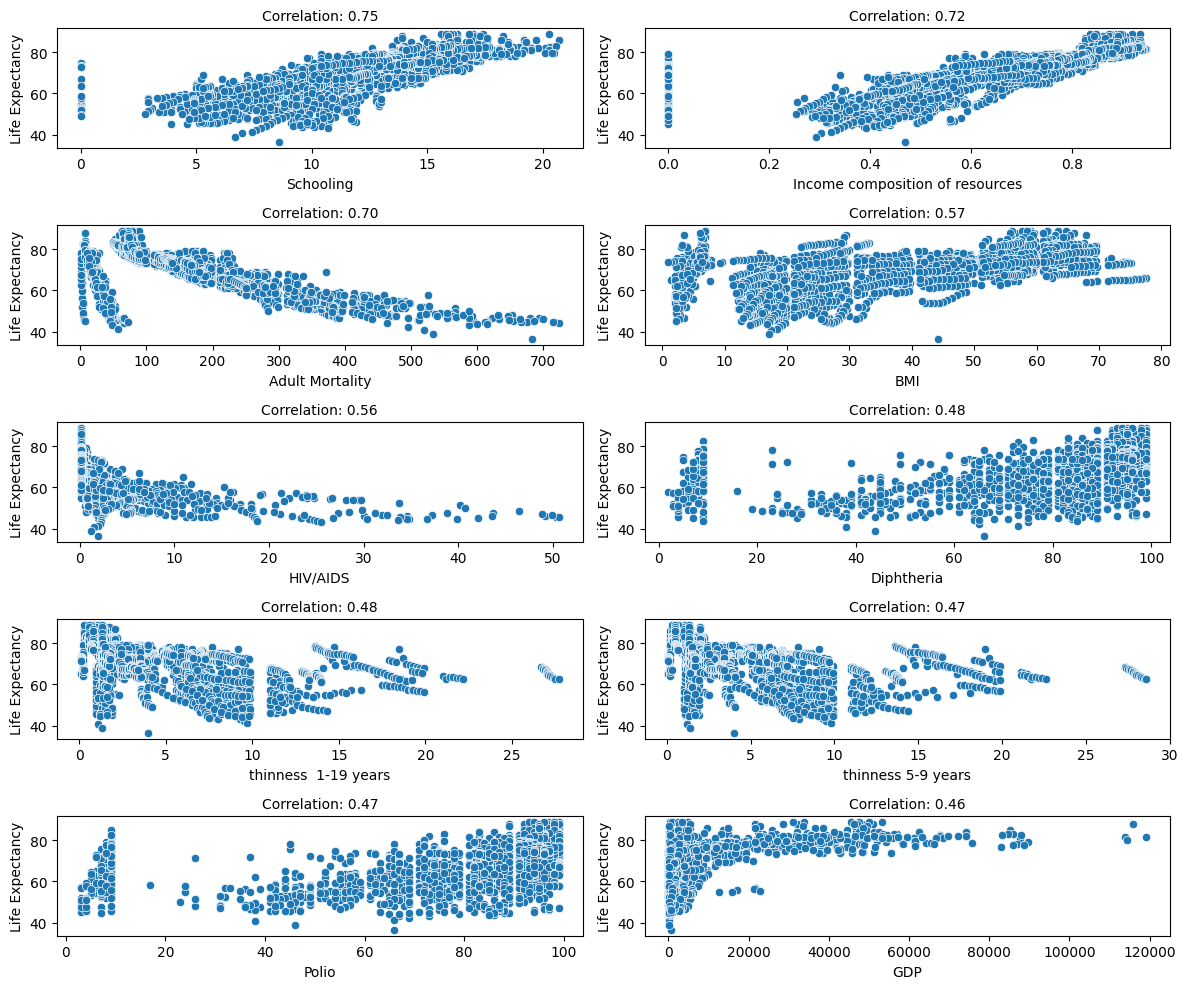

In [ ]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr(method='pearson')

life_expectancy_corr = corr_matrix['Life expectancy'].abs().sort_values(ascending=False)
life_expectancy_corr = life_expectancy_corr[life_expectancy_corr.index != 'Life expectancy']

# Get the top 10 features most correlated with 'Life expectancy'
top_10_life_expectancy_corr = life_expectancy_corr.head(10)

# Plotting
plt.figure(figsize=(12, 10))
for idx, feature in enumerate(top_10_life_expectancy_corr.index, 1):
    correlation_value = top_10_life_expectancy_corr[feature]

    plt.subplot(5, 2, idx)
    sns.scatterplot(x=feature, y='Life expectancy', data=df)
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')
    plt.title(f'Correlation: {correlation_value:.2f}', fontsize=10)


plt.tight_layout()
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Filter variables where 'Life expectancy' has correlation coefficient > 0.6
high_corr_variables = corr_matrix['Life expectancy'][abs(corr_matrix['Life expectancy']) > 0.4]

# Print variables with correlation coefficient of magnitude greater than 0.6
for variable, correlation_coefficient in high_corr_variables.items():
    print(f"'Life expectancy' and '{variable}' have a correlation coefficient of {correlation_coefficient}")

'Life expectancy' and 'Life expectancy' have a correlation coefficient of 1.0
'Life expectancy' and 'Adult Mortality' have a correlation coefficient of -0.6963593137699746
'Life expectancy' and 'Alcohol' have a correlation coefficient of 0.4048767611266021
'Life expectancy' and 'BMI' have a correlation coefficient of 0.5676935475459853
'Life expectancy' and 'Polio' have a correlation coefficient of 0.46555580597719776
'Life expectancy' and 'Diphtheria' have a correlation coefficient of 0.47949486434158606
'Life expectancy' and 'HIV/AIDS' have a correlation coefficient of -0.5565562534006933
'Life expectancy' and 'GDP' have a correlation coefficient of 0.4614551926207384
'Life expectancy' and 'thinness  1-19 years' have a correlation coefficient of -0.477183191572333
'Life expectancy' and 'thinness 5-9 years' have a correlation coefficient of -0.471583604800997
'Life expectancy' and 'Income composition of resources' have a correlation coefficient of 0.7247759785960587
'Life expectancy' 

# **MODIFY**

In [ ]:
# Check Missing Values

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

1.    AdultM, Infant D, Measles, under5death cannot > 1000
2.   PercHealthExp, HepsB,Polio, Thin5,10 cannot > 100
3. PercHealthExp is wrongly input, entire column required to be removed

In [ ]:
import numpy as np
cols = ['infant deaths','Measles','under-five deaths']
for col in cols:
    df.loc[df[col]>1000, col] = np.nan

df.drop('percentage expenditure',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                       13
Alcohol                            194
Hepatitis B                        553
Measles                            525
BMI                                 34
under-five deaths                   16
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Drop rows with misssing life expectancy

In [ ]:
df.dropna(subset=['Life expectancy'], inplace=True)

In [ ]:
total_rows = len(df)
missing_proportions = (df.isnull().sum() / total_rows) * 100
print(missing_proportions)


Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.443989
Alcohol                             6.591530
Hepatitis B                        18.886612
Measles                            17.930328
BMI                                 1.092896
under-five deaths                   0.546448
Polio                               0.648907
Total expenditure                   7.718579
Diphtheria                          0.648907
HIV/AIDS                            0.000000
GDP                                15.129781
Population                         21.994536
thinness  1-19 years                1.092896
thinness 5-9 years                  1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: float64


For missing value,
1.  #>10%, Multilinear imputation method is applied on HepsB, measles
2.  #<10%, GDP will be using expontial regression method.  
3. #Alchol and schooling will be imputed using mean,
4. #other factor have less than 1.5% missing value, they will be remove from dataset



In [ ]:
# We drop variable row that have less than 1.5% missing value
# Based on VIF, we feature engineering Thin5 and Thin10 by averaging them
# remove the Thin 5 and Thin 10
# We dont do for Year, as it will be drop, Life Exp is out target variable so ignore first
# We will drop Und5Death later, as it will use for imputation first

df.dropna(subset=['thinness 5-9 years','thinness  1-19 years','BMI','Polio','Diphtheria','under-five deaths','infant deaths'],inplace=True)
df['Thinness_avg'] = (df['thinness  1-19 years'] + df['thinness 5-9 years'])/2
df.drop(['thinness  1-19 years','thinness 5-9 years'],axis=1,inplace=True)


In [ ]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2872 non-null   object 
 1   Year                             2872 non-null   int64  
 2   Status                           2872 non-null   object 
 3   Life expectancy                  2872 non-null   float64
 4   Adult Mortality                  2872 non-null   float64
 5   infant deaths                    2872 non-null   float64
 6   Alcohol                          2698 non-null   float64
 7   Hepatitis B                      2351 non-null   float64
 8   Measles                          2375 non-null   float64
 9   BMI                              2872 non-null   float64
 10  under-five deaths                2872 non-null   float64
 11  Polio                            2872 non-null   float64
 12  Total expenditure        

In [ ]:
df2 = df.copy()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score,train_test_split,GridSearchCV
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

label_encoders = {}
categorical_features = ['Country', 'Status']
for feature in categorical_features:
    le = LabelEncoder()
    df2[feature] = le.fit_transform(df2[feature])
    label_encoders[feature] = le

x = df2.drop(columns=['Life expectancy'])
y = df2['Life expectancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Imputation functions
def hepsb_imputer(df):
    df = df.copy()
    hepsb_missing_indices = df['Hepatitis B'].isna()
    if hepsb_missing_indices.any():
        hepsb_values = df['Hepatitis B'][~hepsb_missing_indices]
        diph_polio_values = df[['Diphtheria', 'Polio']][~hepsb_missing_indices]
        LRmodel = LinearRegression()
        LRmodel.fit(diph_polio_values, hepsb_values)
        y_pred = LRmodel.predict(df[['Diphtheria', 'Polio']][hepsb_missing_indices])
        df.loc[hepsb_missing_indices, 'Hepatitis B'] = y_pred
    return df

def measles_imputer(df):
    df = df.copy()
    measles_missing_indices = df['Measles'].isna()
    if measles_missing_indices.any():
        measles_values = df['Measles'][~measles_missing_indices]
        infantd_Under5_values = df[['infant deaths', 'under-five deaths']][~measles_missing_indices]
        LRmodel = LinearRegression()
        LRmodel.fit(infantd_Under5_values, measles_values)
        y_pred = LRmodel.predict(df[['infant deaths', 'under-five deaths']][measles_missing_indices])
        df.loc[measles_missing_indices, 'Measles'] = y_pred
    return df

def gdp_imputer(df):
    df = df.copy()
    df.sort_values(by=['Country', 'Year'], inplace=True)
    df['GDP'] = df.groupby('Country')['GDP'].transform(lambda group: group.interpolate().ffill().bfill())
    return df

def pop_imputer(df):
    df = df.copy()
    df.sort_values(by=['Country', 'Year'], inplace=True)
    df['Population'] = df.groupby('Country')['Population'].transform(lambda group: group.interpolate())
    return df

# Create a pipeline for linear imputation
linear_pipeline = Pipeline([
    ('hepsb_imputer', FunctionTransformer(hepsb_imputer, validate=False)),
    ('measles_imputer', FunctionTransformer(measles_imputer, validate=False)),
    ('gdp_imputer', FunctionTransformer(gdp_imputer, validate=False)),
    ('pop_imputer', FunctionTransformer(pop_imputer, validate=False))
])



# Define the numeric features
numeric_features = x_train.select_dtypes(include='number').columns

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))  # Replace missing values with median
])




x_train = linear_pipeline.fit_transform(x_train)
x_train[numeric_features] = numeric_pipeline.fit_transform(x_train[numeric_features])
# Only transform the test data
x_test = linear_pipeline.transform(x_test)
x_test[numeric_features] = numeric_pipeline.transform(x_test[numeric_features])






In [ ]:
#Drop non-significant columns
x_train = x_train.filter(items=['Country', 'Status', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio',
                           'Diphtheria', 'HIV/AIDS', 'GDP', 'Thinness_avg', 'Income composition of resources',
                           'Schooling'])

x_test = x_test.filter(items=['Country', 'Status', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio',
                           'Diphtheria', 'HIV/AIDS', 'GDP', 'Thinness_avg', 'Income composition of resources',
                           'Schooling'])


In [ ]:
x_test

,Country,Status,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Thinness_avg,Income composition of resources,Schooling
30,1.0,1.0,14.0,4.25,46.0,97.0,97.0,0.1,1326.973390,2.10,0.662,10.6
29,1.0,1.0,15.0,3.73,46.9,98.0,98.0,0.1,1453.642777,2.05,0.670,10.7
45,2.0,1.0,145.0,0.36,46.1,86.0,86.0,0.1,1774.336730,6.25,0.653,11.1
44,2.0,1.0,146.0,0.34,47.0,87.0,87.0,0.1,294.335560,6.20,0.663,11.5
43,2.0,1.0,14.0,0.45,47.9,86.0,86.0,0.1,2598.982300,6.15,0.673,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2920,178.0,1.0,611.0,2.61,17.1,86.0,85.0,18.6,378.273624,7.40,0.424,9.8
2937,179.0,1.0,665.0,1.68,25.5,78.0,78.0,43.5,547.358878,11.10,0.434,9.8
2936,179.0,1.0,686.0,1.72,25.9,76.0,75.0,42.1,548.587312,1.65,0.427,9.8
2934,179.0,1.0,715.0,4.06,26.7,7.0,68.0,36.7,453.351155,9.85,0.418,9.5


In [ ]:
x_train

,Country,Status,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Thinness_avg,Income composition of resources,Schooling
15,0.0,1.0,321.0,0.01,12.2,24.0,24.0,0.1,114.560000,2.40,0.338,5.5
14,0.0,1.0,316.0,0.01,12.6,35.0,33.0,0.1,117.496980,2.25,0.340,5.9
13,0.0,1.0,3.0,0.01,13.0,36.0,36.0,0.1,187.845950,11.05,0.341,6.2
12,0.0,1.0,295.0,0.01,13.4,41.0,41.0,0.1,198.728544,19.80,0.373,6.5
11,0.0,1.0,293.0,0.02,13.8,5.0,5.0,0.1,219.141353,19.60,0.381,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2926,179.0,1.0,464.0,6.00,29.9,93.0,93.0,13.3,839.927936,6.75,0.452,10.1
2925,179.0,1.0,429.0,6.09,3.3,95.0,95.0,8.8,955.648466,6.45,0.464,9.8
2924,179.0,1.0,399.0,6.39,3.8,95.0,95.0,6.8,111.227396,6.10,0.488,10.4
2923,179.0,1.0,371.0,6.50,31.3,92.0,91.0,6.3,127.474620,5.80,0.498,10.3


In [ ]:
y_test = y_test.reindex(x_test.index)

In [ ]:
y_train = y_train.reindex(x_train.index)

In [ ]:
df.iloc[29:33]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Thinness_avg
29,Albania,2002,Developing,73.3,15.0,1.0,3.73,96.0,16.0,46.9,1.0,98.0,6.30,98.0,0.1,1453.642777,3511.0,0.670,10.7,2.05
30,Albania,2001,Developing,73.6,14.0,1.0,4.25,96.0,18.0,46.0,1.0,97.0,6.00,97.0,0.1,1326.973390,36173.0,0.662,10.6,2.10
31,Albania,2000,Developing,72.6,11.0,1.0,3.66,96.0,662.0,45.0,1.0,97.0,6.26,97.0,0.1,1175.788981,38927.0,0.656,10.7,2.15
32,Algeria,2015,Developing,75.6,19.0,21.0,NaN,95.0,63.0,59.5,24.0,95.0,NaN,95.0,0.1,4132.762920,39871528.0,0.743,14.4,5.90


# **MODEL + ASSESS**

# **The machine learning method**

1. Linear regression
2. Ridge
3. KNN
4. Random Forest
5. XGBoost


In [ ]:
classifiers= {
    'Lr': LinearRegression(),
    'Rdg': Ridge(),
    'KNN':KNeighborsRegressor(),
    'RF':RandomForestRegressor(),
    'XGB': XGBRegressor()
}


param_grid = {
              'Lr' : {'fit_intercept': [True, False]},
              'Rdg': {'alpha': [0.1, 1, 10]},
              'KNN': {'n_neighbors': [3, 5, 7]},
              'RF': {'n_estimators': [100, 200, 300]},
              'XGB': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
              }

results = []

for classifier_name, classifier in classifiers.items():
    print(f"Performing GridSearchCV for {classifier_name}...")

    grid_search = GridSearchCV(classifier, param_grid[classifier_name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    MSE = mean_squared_error(y_test, grid_search.predict(x_test), squared=True)
    RMSE = mean_squared_error(y_test, grid_search.predict(x_test), squared=False)
    MAE = mean_absolute_error(y_test, grid_search.predict(x_test))
    R2 = r2_score(y_test, grid_search.predict(x_test))

    results.append({
        'Classifier': classifier_name,
        'Best Parameters': grid_search.best_params_,
        'MSE': MSE,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display DataFrame
print(results_df)

Performing GridSearchCV for Lr...
Performing GridSearchCV for Rdg...
Performing GridSearchCV for KNN...
Performing GridSearchCV for RF...
Performing GridSearchCV for XGB...
  Classifier                              Best Parameters        MSE  \
0         Lr                      {'fit_intercept': True}  17.869374   
1        Rdg                                {'alpha': 10}  17.953561   
2        KNN                           {'n_neighbors': 5}  21.921466   
3         RF                        {'n_estimators': 200}   3.637317   
4        XGB  {'learning_rate': 0.1, 'n_estimators': 100}   3.717580   

       RMSE       MAE        R2  
0  4.227218  3.190539  0.815635  
1  4.237164  3.204965  0.814766  
2  4.682037  3.000487  0.773828  
3  1.907175  1.112943  0.962472  
4  1.928103  1.183481  0.961644  


In [ ]:
from tabulate import tabulate

results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+------------+---------------------------------------------+--------------------+--------------------+--------------------+--------------------+
|   | Classifier |               Best Parameters               |        MSE         |        RMSE        |        MAE         |         R2         |
+---+------------+---------------------------------------------+--------------------+--------------------+--------------------+--------------------+
| 0 |     Lr     |           {'fit_intercept': True}           | 17.86937360045485  | 4.227218186994238  | 3.1905394602115034 | 0.8156349776533394 |
| 1 |    Rdg     |                {'alpha': 10}                | 17.95356080040035  |  4.23716424043255  | 3.204965215732054  | 0.8147663867700606 |
| 2 |    KNN     |             {'n_neighbors': 5}              | 21.92146643478261  | 4.682036569141959  | 3.000486956521739  | 0.7738280177309969 |
| 3 |     RF     |            {'n_estimators': 200}            | 3.637317438695653  | 1.9071752511753222 |

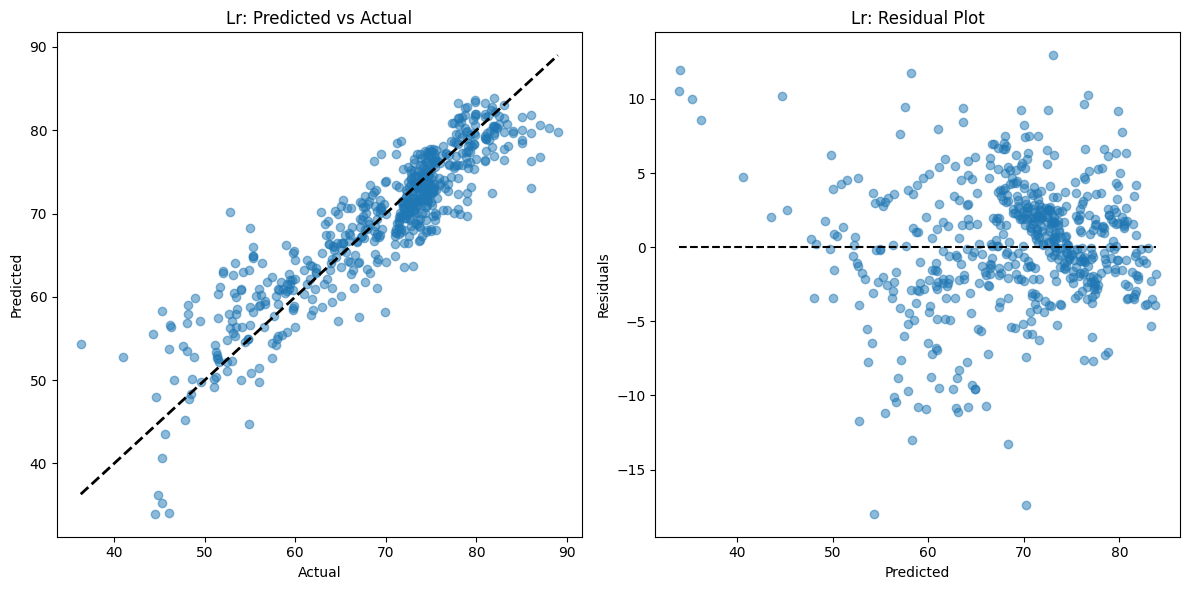

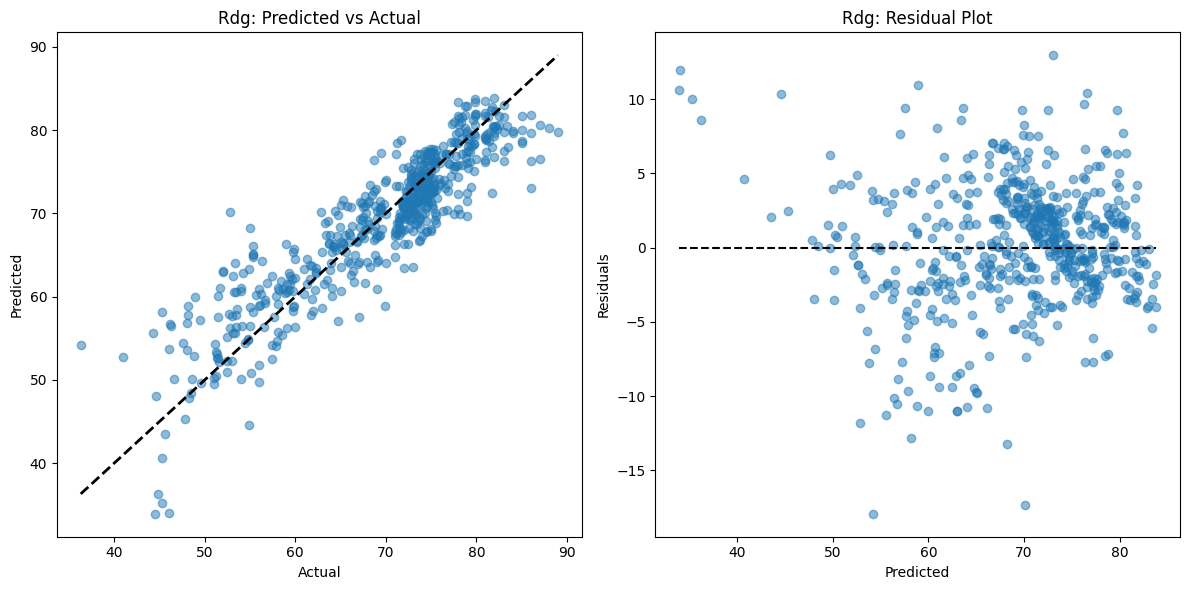

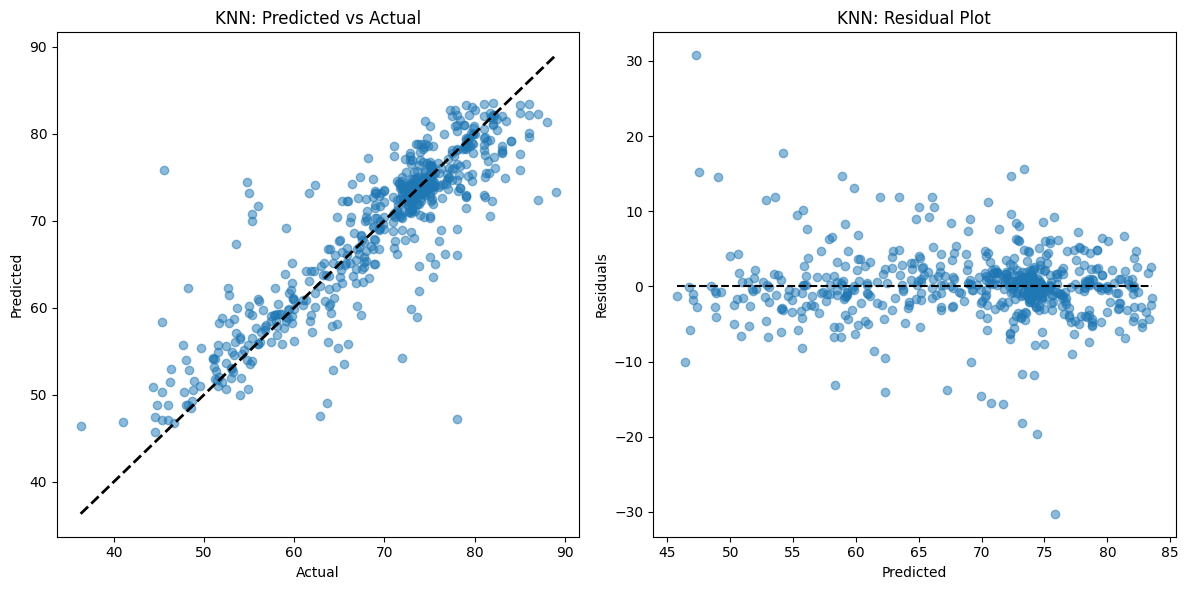

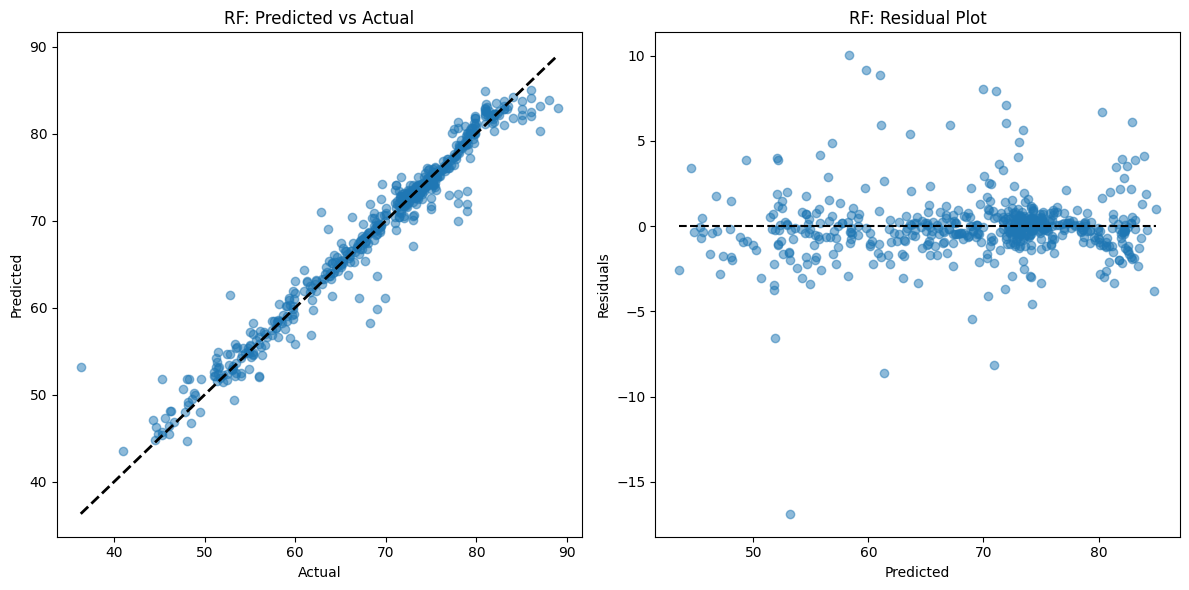

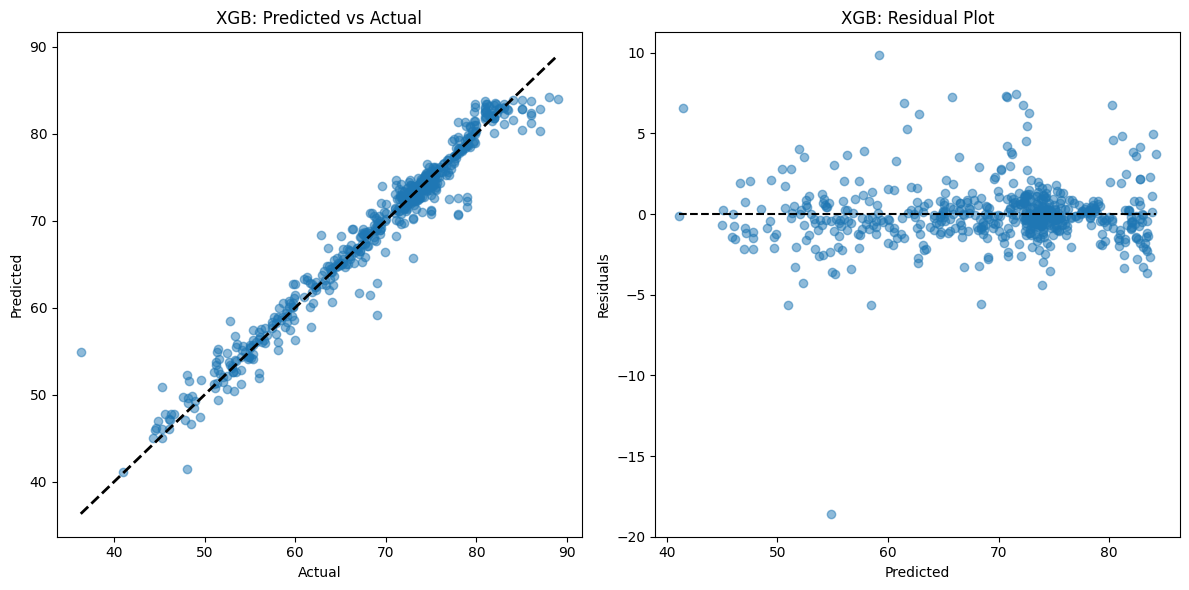

In [ ]:
best_models = {}
for index, row in results_df.iterrows():
    classifier_name = row['Classifier']
    best_params = row['Best Parameters']
    best_model = classifiers[classifier_name].set_params(**best_params)
    best_model.fit(x_train, y_train)
    best_models[classifier_name] = best_model

# Predict values and calculate residuals for each best model
predicted_values = {}
residuals = {}
for classifier_name, model in best_models.items():
    predictions = model.predict(x_test)
    predicted_values[classifier_name] = predictions
    residuals[classifier_name] = y_test - predictions

# Plot predicted vs actual and residual plots for each classifier
for classifier_name, predicted in predicted_values.items():
    residual = residuals[classifier_name]

    # Predicted vs Actual plot
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, predicted, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{classifier_name}: Predicted vs Actual')

    # Residual plot
    plt.subplot(1, 2, 2)
    plt.scatter(predicted, residual, alpha=0.5)
    plt.hlines(0, predicted.min(), predicted.max(), colors='k', linestyles='dashed')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'{classifier_name}: Residual Plot')

    plt.tight_layout()
    plt.show()